SpecAugment is a simple data augmentation method for speech recognition. For more info, check the original paper at:
https://arxiv.org/abs/1904.08779. 

We will show the result of applying SpecAugment on a sample audio from Librosa.

In [1]:
import kapre
print(kapre.__version__)

0.3.6


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import librosa
from kapre.augmentation import SpecAugment
from kapre.composed import get_melspectrogram_layer
import matplotlib.pyplot as plt

filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

Since SpecAugment is applied on spectrograms, we will first generate the mel spectrograms of the audio example using Kapre layers as well.

In [3]:
audio_tensor = tf.reshape(tf.cast(y, tf.float32), (1, -1, 1))
input_shape = y.reshape(-1, 1).shape


melgram = get_melspectrogram_layer(input_shape=input_shape,
                                                  n_fft=1024,
                                                  return_decibel=True,
                                                  n_mels=256,
                                                  input_data_format='channels_last',
                                                  output_data_format='channels_last')

2021-12-14 12:51:35.369990: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-14 12:51:35.370358: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now we instantiate the SpecAugment layer. We are using a `freq_mask_param` of 5, a `time_mask_param` of 10 , 2 frequency masks (`n_freq_masks`) and 3 time masks (`n_time_mask`). We will use a mask_value (`mask_value`) of -100.

In [4]:
spec_augment = SpecAugment(freq_mask_param=5,
                           time_mask_param=10,
                           n_freq_masks=2,
                           n_time_masks=3,
                           mask_value=-100)                 

Let's create the model and check the summary.

In [5]:
model = Sequential()
model.add(melgram)
model.add(spec_augment)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
melspectrogram (Sequential)  (None, 456, 256, 1)       0         
_________________________________________________________________
spec_augment (SpecAugment)   (None, 456, 256, 1)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Let's see now the original Mel Spectrogram and then the transformed (augmented) Spectrogram.

In [6]:
original_spectrogram = model(audio_tensor)

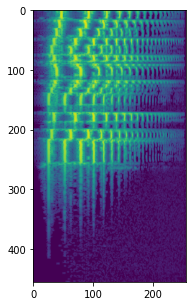

In [7]:
plt.figure(figsize=(5, 5))
plt.imshow(original_spectrogram[0, :, :, :])

To apply SpecAugment, in this case, we must set `training` to `True`.

In [8]:
augmented_spectrogram = model(audio_tensor, training=True)

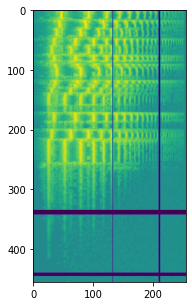

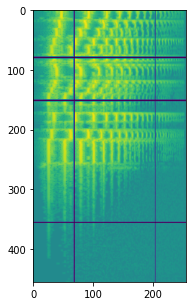

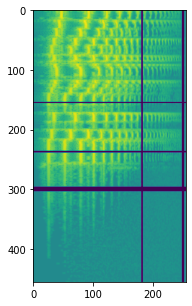

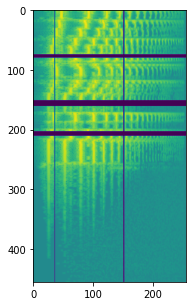

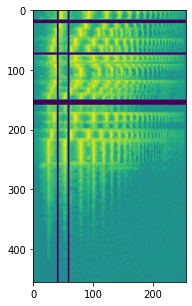

In [9]:
for _ in range(5):
    augmented_spectrogram = model(audio_tensor, training=True)
    plt.figure(figsize=(5, 5))
    plt.imshow(augmented_spectrogram[0, :, :, :])